# Milestone 1: Vizualizations 1-3 Notebook

## Data Import and Cleaning
First we'll import Pandas and our merged dataframe and clean it for further visualization

In [1]:
#Import pandas
import pandas as pd

#Import main dataset "match_birthday"
df = pd.read_csv('resources/match_birthday.csv')

#Tap-tap is this thing on?
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,Date,ID,BIRTHDATE,COUNTRY,BIRTH
0,2010-339,Brisbane,Hard,32,A,20100103,1,104053,1.0,NaN,...,5.0,7.0,4410.0,77.0,598.0,2010-01-03,104053,19820830.0,USA,1982-08-30
1,2010-339,Brisbane,Hard,32,A,20100103,17,104053,1.0,NaN,...,8.0,7.0,4410.0,134.0,400.0,2010-01-03,104053,19820830.0,USA,1982-08-30
2,2010-339,Brisbane,Hard,32,A,20100103,25,104053,1.0,NaN,...,8.0,7.0,4410.0,52.0,850.0,2010-01-03,104053,19820830.0,USA,1982-08-30
3,2010-339,Brisbane,Hard,32,A,20100103,29,104053,1.0,NaN,...,12.0,7.0,4410.0,20.0,1655.0,2010-01-03,104053,19820830.0,USA,1982-08-30
4,2010-339,Brisbane,Hard,32,A,20100103,31,104053,1.0,NaN,...,8.0,7.0,4410.0,12.0,2625.0,2010-01-03,104053,19820830.0,USA,1982-08-30


In [11]:
#Create a column for years
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year

#Create and filter a winner df
winner_df= df[['tourney_name', 'surface', 'winner_name','year']]
winner_df.rename(columns={'winner_name': 'player'}, inplace=True)
winner_df['wins'] = 1

#Create and filter a loser df
loser_df= df[['tourney_name', 'surface', 'loser_name','year']]
loser_df.rename(columns={'loser_name': 'player'}, inplace=True)
loser_df['wins'] = 0
 
#Combine loser and winner dfs    
new_df = pd.concat([winner_df, loser_df], ignore_index=True)

#Group by player and wins to get total win ratio per player and win ratio per player by surface
total_win_ratio = new_df.groupby('player')['wins'].mean() * 100
surface_win_ratio = new_df.groupby(['player', 'surface', 'year'])['wins'].mean() * 100

#Outer merge to create a new df containing both variables 
result_df = pd.merge(surface_win_ratio, total_win_ratio, how='outer', left_index=True, right_index=True, suffixes=('_surface', '_total'),  indicator=True)
result_df = result_df.reset_index()

#Preview results
result_df.head()

,player,surface,year,wins_surface,wins_total,_merge
0,Abd Hazli Bin Zainuddin,Hard,2010,0.0,0.0,both
1,Abdulhameed Alshatti,Hard,2014,0.0,0.0,both
2,Abdulhamid Mubarak,Clay,2016,0.0,0.0,both
3,Abdulla Hajji,Hard,2010,0.0,0.0,both
4,Abdullah Maqdas,Clay,2015,50.0,50.0,both


In [12]:
#Can't forget this heh...
import plotly.express as px

## Visualization 1:
### Interactive Time-series Histogram

#### Comparative analysis of volume of matches played on each court type over 2010-2020

This analysis attempts to compare the distributions of court types used in each year of the ATP tour from 2010-2020. By using histograms, we expect to see if there are any trends or patterns in court type usage occurring year over year that may inform further research.


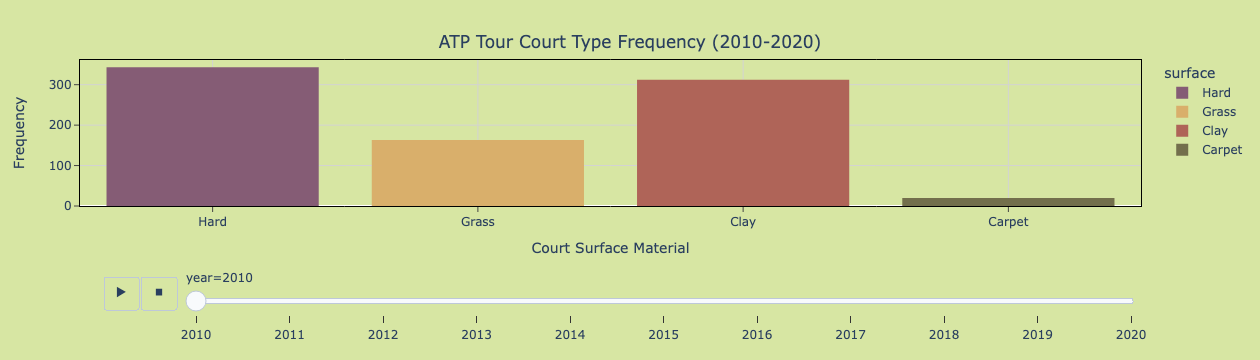

In [13]:
#Create a histogram function using Plotly that can be called on our new df 
def histogram(df):
    
    df = df.sort_values(by='year')
    
    #Plot using px.histogram
    fig = px.histogram(df, 
                     x='surface', 
                     color="surface",
                     color_discrete_sequence=px.colors.qualitative.Antique,
                     animation_frame="year", #setting the animation frame will create a slider for interactivty and set it to year to cycle through them
                    )
    
    #Update titles and formatting
    fig.update_layout(title={'text': "ATP Tour Court Type Frequency (2010-2020)",
                            'xanchor': 'center',
                            'yanchor': 'top',
                            'y':0.9,
                            'x':0.5},
                      xaxis_title="Court Surface Material",
                      yaxis_title="Frequency",
                      
                      #Make stuff green
                      plot_bgcolor='#d7e6a3',
                      paper_bgcolor='#d7e6a3',
                     )
    

    #Make it legible because now it's green
    fig.update_xaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )
    fig.update_yaxes(
        mirror=True,
        ticks='outside',
        linecolor='black',
        gridcolor='lightgrey'
    )
    return fig


#Call violin on the result_df to view our plot
histogram(result_df)


Using a histogram we are able to see hard courts are the most common surface type in the ATP tour, while carpet is the least. The ATP stopped using carpet courts in professional tennis in 2009, right before our data begins, which is likely why we see such a low frequency of carpet courts across the entire data set.

There was a large difference in the number of grass courts played on in 2020. The lowest amount of grass court matches over the past 10 years which likely occurred as a result of the 6-week shutdown due to the COVID-19 outbreak.

## Visualization 2:
### Violin Plot

#### Comparative analysis of win rates by court surface type across all years
This analysis attempts to compare the distributions of win rates across each surface type during all ten years of ATP tour data. By using violin plots for each surface type, we expect to learn what, if any, distributions may be skewed or have less variation than others to determine the best court type for standardization.

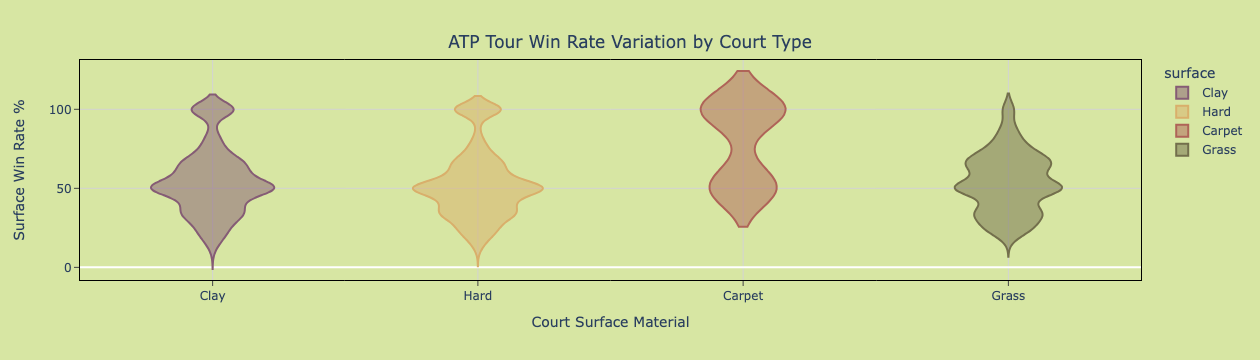

In [10]:
#Create a violin function using Plotly that can be called on our new df 
def violin(df):
    
    #Remove zero percent wins by surface so we can see the shape better
    df = df[df['wins_surface'] != 0]
    
    #Plot using px.violin
    fig = px.violin(df, 
                     x='surface', 
                     y="wins_surface",
                     color="surface",
                     color_discrete_sequence=px.colors.qualitative.Antique,
                    )
    
    #Update titles and formatting
    fig.update_layout(title={'text': "ATP Tour Win Rate Variation by Court Type",
                            'xanchor': 'center',
                            'yanchor': 'top',
                            'y':0.9,
                            'x':0.5},
                      xaxis_title="Court Surface Material",
                      yaxis_title="Surface Win Rate %",
                      
                      #Make stuff green
                      plot_bgcolor='#d7e6a3',
                      paper_bgcolor='#d7e6a3',
                     )
    

    #Make it legible because now it's green
    fig.update_xaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )
    fig.update_yaxes(
        mirror=True,
        ticks='outside',
        linecolor='black',
        gridcolor='lightgrey'
    )
    return fig


#Call violin on the result_df to view our plot
violin(result_df)

After removing zero percent from the win rates to mitigate noise, clay and hard court surfaces have similarly shaped distributions. The shape of the grass court distribution appears to be heavily influenced by the upper and lower quartiles, likely as a result of limited data on this court type. Clay and grass courts share the same upper and lower quartiles at Q3:66% and Q1:40% despite the disparity between data between them. Lastly, when compared against clay and grass courts, hard courts have a smaller variation in win rate percentage. 

_This visualization, along with our previous histogram, leads us to believe that we would need more data on hard and grass courts to determine if ATP needs to regulate them further, though our initial findings point towards hard courts being the best choice for standardization._


## Visualization 3:
### Interactive Time-series Scatter Plot

#### Comparative analysis of top ATP tennis players win rates by surface over 2010-2020
This analysis use OLS regression lines across a scatterplot to examine top players performance over time on each court surface to determine if they adapt to the ATP Tour’s courts over time or struggle consistently on certain court types. If there is a significant disparity between performance on any court type, we will present this to the ATP for review.

In [14]:
#Create a scatter_interactivity function using Plotly 
def scatter_interactivity(df):
    
    #Plot using px.scatter
    fig = px.scatter(df, 
                     x='year', 
                     y="wins_surface", 
                     hover_name="player", 
                     #size="wins_surface",
                     color="surface",
                     color_discrete_sequence=px.colors.qualitative.Antique,
                     trendline="ols", #We will use ordinary least squares regression without setting the trendline to "overall" since we are cycling through the years
                     animation_frame="player", #setting the animation frame will create a slider for interactivty and set it to year to cycle through them
                     #animation_group="year" #setting animation group so we can view each players performance over time
                    )
    
    #Update titles and formatting
    fig.update_layout(title={'text': "Top ATP Players Total Win Rate vs Win Rate by Surface (2010-2020)",
                            'xanchor': 'center',
                            'yanchor': 'top',
                            'y':0.9,
                            'x':0.5},
                      xaxis_title="Year",
                      yaxis_title="Total Win Rate %",
                      plot_bgcolor='#d7e6a3',
                      paper_bgcolor='#d7e6a3',
                     )
    

    fig.update_xaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )
    fig.update_yaxes(
        mirror=True,
        ticks='outside',
        #showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )
    return fig

#scatter_interactivity(result_df)

In [15]:
#Create list of top playears and filter to create new df
top_players = ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic', 'Andy Murray']
top_players_df = result_df[result_df['player'].isin(top_players)]

#Preview top players df
top_players_df.head()

,player,surface,year,wins_surface,wins_total,_merge
659,Andy Murray,Clay,2010,60.000000,79.725086,both
660,Andy Murray,Clay,2011,75.000000,79.725086,both
661,Andy Murray,Clay,2012,69.230769,79.725086,both
662,Andy Murray,Clay,2013,71.428571,79.725086,both
663,Andy Murray,Clay,2014,73.333333,79.725086,both


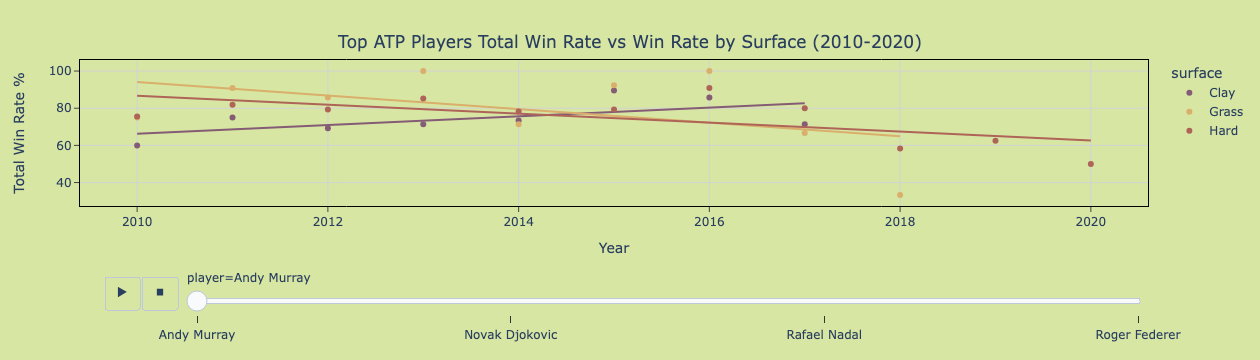

In [17]:
#Call the scatter plot function on our top_players df
scatter_interactivity(top_players_df)

When looking at performance across time, Andy Murray was affected the most by court types. His win rate went down year over year when playing matches on grass and hard courts.

Of the top players in the ATP Tour from 2010-2018, Roger Federer’s win rate was the least affected by court types. For instance, Federer’s win rate on clay courts remains around 75%.

_This visualization show most players are unaffected by court type and show consistent performance on each court surface across time. However,  it is inconclusive of whether or not win rate is affected by courts or increases/decreases over time in general._   


In [23]:
#Create a function to define top players from the dataset and make a top players df
def top_players(df):

    # Specify the number of top players you want to select
    top_n = 4

    # Find the top N most frequent players
    top_players = df['player'].value_counts().head(top_n).index

    # Filter the DataFrame to include only rows with these top cities
    filtered_df = df[df['player'].isin(top_players)]

    # Sort the filtered DataFrame by 'WinRate' from highest to lowest
    sorted_filtered_df = filtered_df.sort_values(by='wins_total', ascending=False)

    # Create a new DataFrame with the sorted filtered rows
    new_df = pd.DataFrame(sorted_filtered_df)

    # Display the new DataFrame
    return new_df

#Call top_players on results_df 
top_players_df = top_players(result_df)

#testing testing 1..2..
top_4_players = top_players_df['player'].unique()

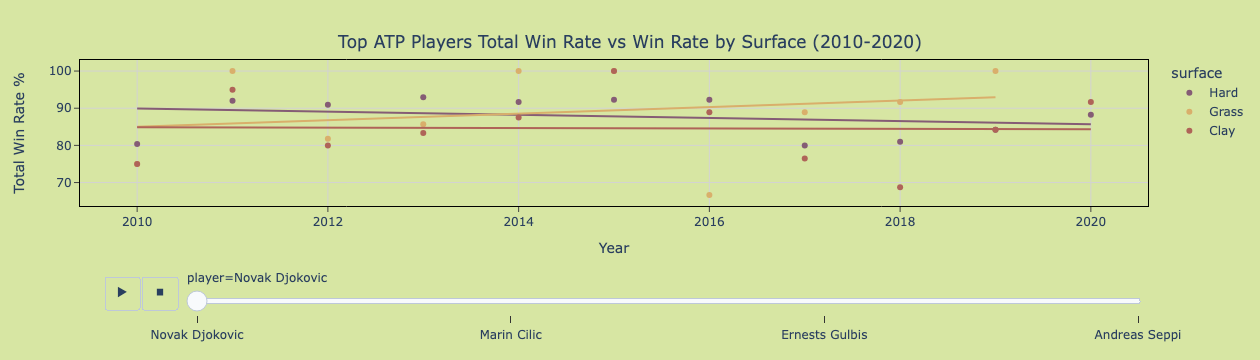

In [22]:
scatter_interactivity(top_players_df)